# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

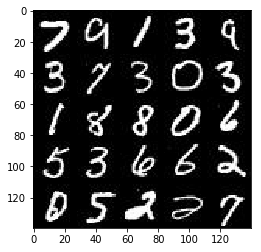

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

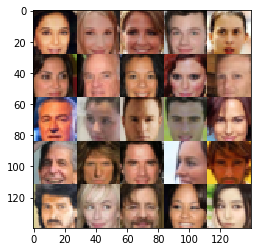

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_input_images')
    tensor_z_data = tf.placeholder(tf.float32, (None, z_dim), name = 'tensor_z_date')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')
    
    return real_input_images, tensor_z_data, learning_rate_


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
       
    alpha = 0.2
        
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.7)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.7)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.7)
        
        x4 = tf.layers.conv2d(x3, 512, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha * x4, x4)

        flat = tf.contrib.layers.flatten(x4)
        dis_logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(dis_logits)
        
        return out, dis_logits
        
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha=0.2
    reuse = not is_train
    with tf.variable_scope('generator', reuse=reuse):

        x1 = tf.layers.dense(z, 2*2*512)
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.5)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 2, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.5)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=1)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.5)
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        #x4 = tf.layers.conv2d_transpose(x4, 64, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.nn.dropout(x4, 0.5)      
        
        gen_logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        
        out = tf.tanh(gen_logits)
    
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_logits_fake, d_model_fake = discriminator(g_model, reuse = True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_model_fake)))                           
    discriminator_loss = d_loss_real + d_loss_fake
    
    return discriminator_loss, generator_loss
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function

    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        dis_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)

    return dis_train_opt, gen_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(generator(input_z, out_channel_dim, False), feed_dict={input_z: example_z})
    
    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, depth = data_shape
    input_real, input_z, learning_rate_ = model_inputs(width, height, depth, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, depth)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate_, beta1)
    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z,
                                               learning_rate_: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z,
                                               learning_rate_: learning_rate})
                
                if steps % 10 == 0:
                    
                    train_loss_d = d_loss.eval({input_real: batch_images,
                                               input_z: batch_z,
                                               learning_rate_: learning_rate})
                    train_loss_g = g_loss.eval({input_real: batch_images,
                                               input_z: batch_z,
                                               learning_rate_: learning_rate})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, depth, data_image_mode)
                    
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.2340... Generator Loss: 0.5740
Epoch 1/2... Discriminator Loss: 1.0773... Generator Loss: 0.6780
Epoch 1/2... Discriminator Loss: 2.7513... Generator Loss: 0.6898
Epoch 1/2... Discriminator Loss: 1.3870... Generator Loss: 0.4721
Epoch 1/2... Discriminator Loss: 1.6056... Generator Loss: 0.3549
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.4324
Epoch 1/2... Discriminator Loss: 1.7303... Generator Loss: 0.3327
Epoch 1/2... Discriminator Loss: 1.1823... Generator Loss: 0.6225
Epoch 1/2... Discriminator Loss: 1.6200... Generator Loss: 0.3331
Epoch 1/2... Discriminator Loss: 1.0973... Generator Loss: 0.6689


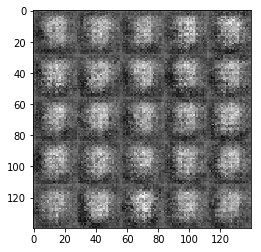

Epoch 1/2... Discriminator Loss: 1.3175... Generator Loss: 0.4862
Epoch 1/2... Discriminator Loss: 1.1466... Generator Loss: 0.6623
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 0.6912
Epoch 1/2... Discriminator Loss: 1.0433... Generator Loss: 0.6864
Epoch 1/2... Discriminator Loss: 1.0494... Generator Loss: 0.6876
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 0.6883
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 0.6863
Epoch 1/2... Discriminator Loss: 1.0922... Generator Loss: 0.6868
Epoch 1/2... Discriminator Loss: 1.0521... Generator Loss: 0.6875
Epoch 1/2... Discriminator Loss: 1.3529... Generator Loss: 0.5736


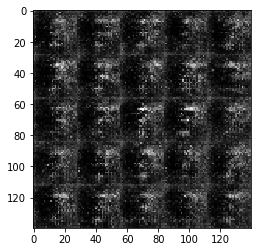

Epoch 1/2... Discriminator Loss: 1.0514... Generator Loss: 0.6772
Epoch 1/2... Discriminator Loss: 1.0386... Generator Loss: 0.6914
Epoch 1/2... Discriminator Loss: 1.6066... Generator Loss: 0.3345
Epoch 1/2... Discriminator Loss: 1.0360... Generator Loss: 0.6857
Epoch 1/2... Discriminator Loss: 1.0417... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 1.0288... Generator Loss: 0.6907
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 0.6905
Epoch 1/2... Discriminator Loss: 1.0273... Generator Loss: 0.6892
Epoch 1/2... Discriminator Loss: 1.0735... Generator Loss: 0.6567
Epoch 1/2... Discriminator Loss: 1.0856... Generator Loss: 0.6890


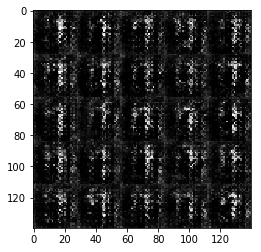

Epoch 1/2... Discriminator Loss: 1.0650... Generator Loss: 0.6679
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0219... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0349... Generator Loss: 0.6914
Epoch 1/2... Discriminator Loss: 1.0226... Generator Loss: 0.6921
Epoch 1/2... Discriminator Loss: 1.0242... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 0.6901
Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 0.6867
Epoch 1/2... Discriminator Loss: 1.8557... Generator Loss: 0.3160
Epoch 1/2... Discriminator Loss: 1.3573... Generator Loss: 0.4940


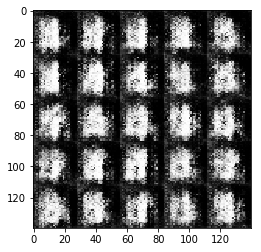

Epoch 1/2... Discriminator Loss: 1.0276... Generator Loss: 0.6873
Epoch 1/2... Discriminator Loss: 1.0363... Generator Loss: 0.6833
Epoch 1/2... Discriminator Loss: 1.0302... Generator Loss: 0.6894
Epoch 1/2... Discriminator Loss: 1.0255... Generator Loss: 0.6905
Epoch 1/2... Discriminator Loss: 1.0291... Generator Loss: 0.6897
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0314... Generator Loss: 0.6837
Epoch 1/2... Discriminator Loss: 1.5933... Generator Loss: 0.3403
Epoch 1/2... Discriminator Loss: 1.0496... Generator Loss: 0.6779
Epoch 1/2... Discriminator Loss: 1.0354... Generator Loss: 0.6856


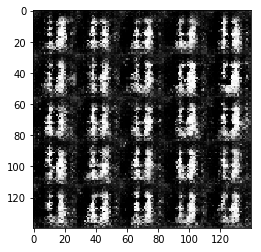

Epoch 1/2... Discriminator Loss: 1.0262... Generator Loss: 0.6898
Epoch 1/2... Discriminator Loss: 1.0258... Generator Loss: 0.6908
Epoch 1/2... Discriminator Loss: 1.0311... Generator Loss: 0.6931
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0243... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0209... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0210... Generator Loss: 0.6922
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 0.6902
Epoch 1/2... Discriminator Loss: 1.0229... Generator Loss: 0.6906
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 0.6788


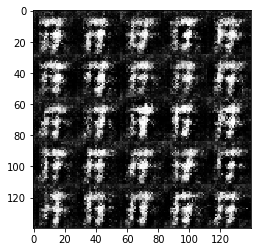

Epoch 1/2... Discriminator Loss: 1.0210... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0201... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0240... Generator Loss: 0.6920
Epoch 1/2... Discriminator Loss: 1.6363... Generator Loss: 0.3311
Epoch 1/2... Discriminator Loss: 1.1373... Generator Loss: 0.6088
Epoch 1/2... Discriminator Loss: 1.0408... Generator Loss: 0.6778
Epoch 1/2... Discriminator Loss: 1.0385... Generator Loss: 0.6821
Epoch 1/2... Discriminator Loss: 1.1764... Generator Loss: 0.6739
Epoch 1/2... Discriminator Loss: 1.0286... Generator Loss: 0.6904


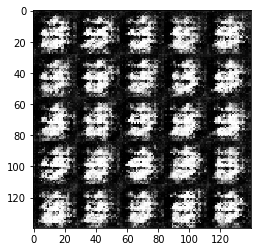

Epoch 1/2... Discriminator Loss: 1.0249... Generator Loss: 0.6905
Epoch 1/2... Discriminator Loss: 1.0278... Generator Loss: 0.6930
Epoch 1/2... Discriminator Loss: 1.0277... Generator Loss: 0.6911
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 0.6919
Epoch 1/2... Discriminator Loss: 1.0283... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 1.0276... Generator Loss: 0.6926
Epoch 1/2... Discriminator Loss: 1.0274... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 0.6921
Epoch 1/2... Discriminator Loss: 1.0257... Generator Loss: 0.6908
Epoch 1/2... Discriminator Loss: 1.0312... Generator Loss: 0.6855


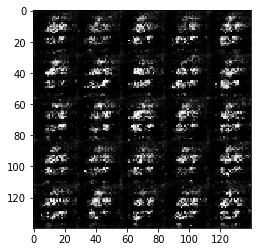

Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 0.6924
Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.0219... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0226... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0214... Generator Loss: 0.6926
Epoch 1/2... Discriminator Loss: 1.0205... Generator Loss: 0.6927
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 0.6929
Epoch 1/2... Discriminator Loss: 1.0220... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0206... Generator Loss: 0.6930


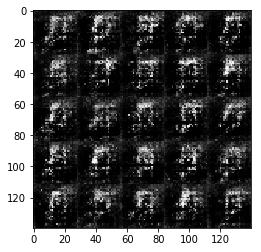

Epoch 1/2... Discriminator Loss: 1.0193... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0204... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.0205... Generator Loss: 0.6926
Epoch 2/2... Discriminator Loss: 1.0203... Generator Loss: 0.6923
Epoch 2/2... Discriminator Loss: 1.0216... Generator Loss: 0.6917
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.0273... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.0378... Generator Loss: 0.6897
Epoch 2/2... Discriminator Loss: 1.0229... Generator Loss: 0.6921
Epoch 2/2... Discriminator Loss: 1.0278... Generator Loss: 0.6888


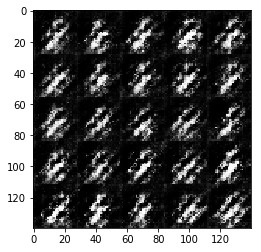

Epoch 2/2... Discriminator Loss: 1.0248... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 1.0302... Generator Loss: 0.6870
Epoch 2/2... Discriminator Loss: 1.0237... Generator Loss: 0.6928
Epoch 2/2... Discriminator Loss: 1.0222... Generator Loss: 0.6905
Epoch 2/2... Discriminator Loss: 1.0219... Generator Loss: 0.6925
Epoch 2/2... Discriminator Loss: 1.0334... Generator Loss: 0.6917
Epoch 2/2... Discriminator Loss: 1.4953... Generator Loss: 0.3825
Epoch 2/2... Discriminator Loss: 1.0629... Generator Loss: 0.6713
Epoch 2/2... Discriminator Loss: 1.0765... Generator Loss: 0.6824
Epoch 2/2... Discriminator Loss: 1.0489... Generator Loss: 0.6727


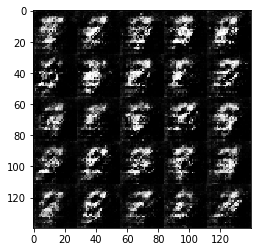

Epoch 2/2... Discriminator Loss: 1.0282... Generator Loss: 0.6913
Epoch 2/2... Discriminator Loss: 1.0258... Generator Loss: 0.6922
Epoch 2/2... Discriminator Loss: 1.0241... Generator Loss: 0.6906
Epoch 2/2... Discriminator Loss: 1.0305... Generator Loss: 0.6904
Epoch 2/2... Discriminator Loss: 1.0339... Generator Loss: 0.6920
Epoch 2/2... Discriminator Loss: 1.0766... Generator Loss: 0.6687
Epoch 2/2... Discriminator Loss: 1.0379... Generator Loss: 0.6878
Epoch 2/2... Discriminator Loss: 1.5837... Generator Loss: 0.3443
Epoch 2/2... Discriminator Loss: 1.0787... Generator Loss: 0.6681
Epoch 2/2... Discriminator Loss: 1.1547... Generator Loss: 0.6642


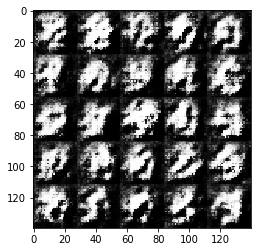

Epoch 2/2... Discriminator Loss: 1.5339... Generator Loss: 0.3937
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 0.6443
Epoch 2/2... Discriminator Loss: 1.5476... Generator Loss: 0.6908
Epoch 2/2... Discriminator Loss: 1.3483... Generator Loss: 0.4974
Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 0.6059
Epoch 2/2... Discriminator Loss: 1.1742... Generator Loss: 0.5990
Epoch 2/2... Discriminator Loss: 1.3392... Generator Loss: 0.5170
Epoch 2/2... Discriminator Loss: 1.0506... Generator Loss: 0.6790
Epoch 2/2... Discriminator Loss: 1.2217... Generator Loss: 0.5648
Epoch 2/2... Discriminator Loss: 1.0348... Generator Loss: 0.6894


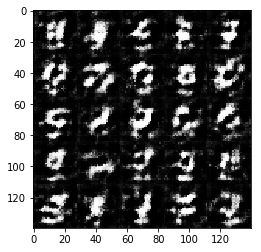

Epoch 2/2... Discriminator Loss: 1.1096... Generator Loss: 0.6809
Epoch 2/2... Discriminator Loss: 1.7058... Generator Loss: 0.3498
Epoch 2/2... Discriminator Loss: 1.1260... Generator Loss: 0.6765
Epoch 2/2... Discriminator Loss: 1.2021... Generator Loss: 0.5865
Epoch 2/2... Discriminator Loss: 1.1063... Generator Loss: 0.6891
Epoch 2/2... Discriminator Loss: 1.0404... Generator Loss: 0.6816
Epoch 2/2... Discriminator Loss: 1.0635... Generator Loss: 0.6865
Epoch 2/2... Discriminator Loss: 1.0588... Generator Loss: 0.6842
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 0.6853
Epoch 2/2... Discriminator Loss: 1.0610... Generator Loss: 0.6470


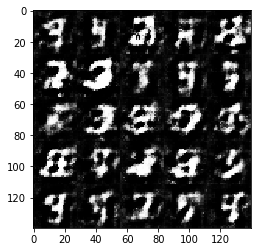

Epoch 2/2... Discriminator Loss: 1.0362... Generator Loss: 0.6883
Epoch 2/2... Discriminator Loss: 1.0266... Generator Loss: 0.6919
Epoch 2/2... Discriminator Loss: 1.0275... Generator Loss: 0.6903
Epoch 2/2... Discriminator Loss: 1.0299... Generator Loss: 0.6891
Epoch 2/2... Discriminator Loss: 1.0313... Generator Loss: 0.6895
Epoch 2/2... Discriminator Loss: 1.0268... Generator Loss: 0.6885
Epoch 2/2... Discriminator Loss: 1.0278... Generator Loss: 0.6848
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 0.6845
Epoch 2/2... Discriminator Loss: 1.0383... Generator Loss: 0.6822
Epoch 2/2... Discriminator Loss: 1.0753... Generator Loss: 0.6658


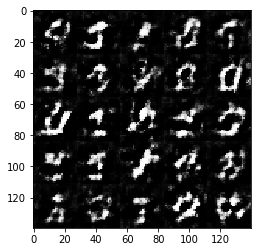

Epoch 2/2... Discriminator Loss: 1.0804... Generator Loss: 0.6642
Epoch 2/2... Discriminator Loss: 1.0462... Generator Loss: 0.6738
Epoch 2/2... Discriminator Loss: 1.0328... Generator Loss: 0.6913
Epoch 2/2... Discriminator Loss: 1.0430... Generator Loss: 0.6883
Epoch 2/2... Discriminator Loss: 1.0379... Generator Loss: 0.6897
Epoch 2/2... Discriminator Loss: 1.0396... Generator Loss: 0.6722
Epoch 2/2... Discriminator Loss: 1.0473... Generator Loss: 0.6919
Epoch 2/2... Discriminator Loss: 1.0830... Generator Loss: 0.6543
Epoch 2/2... Discriminator Loss: 1.0333... Generator Loss: 0.6924
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 0.6911


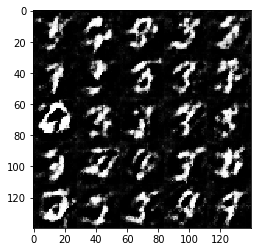

Epoch 2/2... Discriminator Loss: 1.0310... Generator Loss: 0.6862
Epoch 2/2... Discriminator Loss: 1.0273... Generator Loss: 0.6856
Epoch 2/2... Discriminator Loss: 1.0345... Generator Loss: 0.6833
Epoch 2/2... Discriminator Loss: 1.0393... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 1.0708... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.1312... Generator Loss: 0.6837
Epoch 2/2... Discriminator Loss: 1.0368... Generator Loss: 0.6897
Epoch 2/2... Discriminator Loss: 1.0272... Generator Loss: 0.6844
Epoch 2/2... Discriminator Loss: 1.0629... Generator Loss: 0.6378
Epoch 2/2... Discriminator Loss: 1.0312... Generator Loss: 0.6907


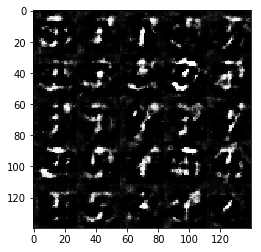

Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 0.6908
Epoch 2/2... Discriminator Loss: 1.0428... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.0289... Generator Loss: 0.6871
Epoch 2/2... Discriminator Loss: 1.0346... Generator Loss: 0.6722
Epoch 2/2... Discriminator Loss: 1.0275... Generator Loss: 0.6849
Epoch 2/2... Discriminator Loss: 1.0333... Generator Loss: 0.6862
Epoch 2/2... Discriminator Loss: 1.0510... Generator Loss: 0.6701
Epoch 2/2... Discriminator Loss: 1.1107... Generator Loss: 0.6886
Epoch 2/2... Discriminator Loss: 1.0574... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.0305... Generator Loss: 0.6921


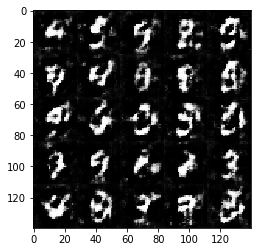

Epoch 2/2... Discriminator Loss: 1.0317... Generator Loss: 0.6924
Epoch 2/2... Discriminator Loss: 1.0297... Generator Loss: 0.6870
Epoch 2/2... Discriminator Loss: 1.0501... Generator Loss: 0.6802
Epoch 2/2... Discriminator Loss: 1.4126... Generator Loss: 0.6911
Epoch 2/2... Discriminator Loss: 1.0607... Generator Loss: 0.6755
Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.6776
Epoch 2/2... Discriminator Loss: 1.0298... Generator Loss: 0.6911


In [27]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.5566
Epoch 1/1... Discriminator Loss: 1.5012... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.4766
Epoch 1/1... Discriminator Loss: 1.0751... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.0466... Generator Loss: 0.6878


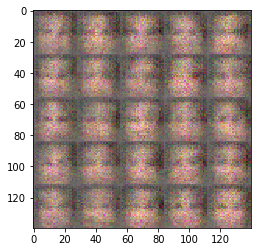

Epoch 1/1... Discriminator Loss: 1.0372... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.0310... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.0271... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.7634... Generator Loss: 0.3577
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.6816


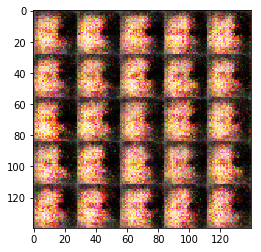

Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.0411... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.0402... Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 0.6862


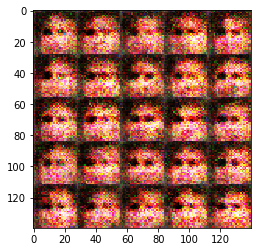

Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0268... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0245... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0243... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.0234... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.0238... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 0.6886


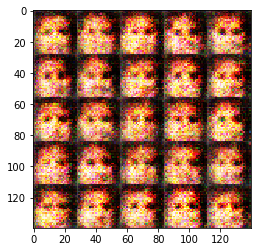

Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 0.6733
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0248... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0227... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0221... Generator Loss: 0.6921


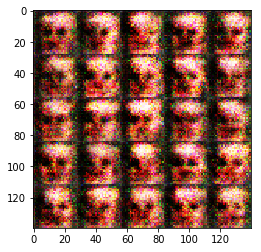

Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0221... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0209... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.0210... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.6928


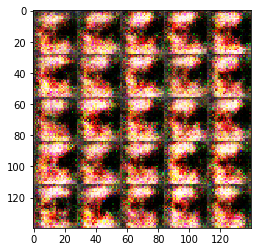

Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.6927


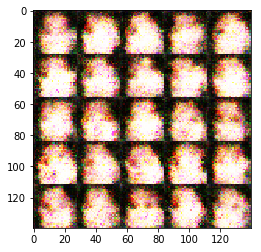

Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.0227... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.6929


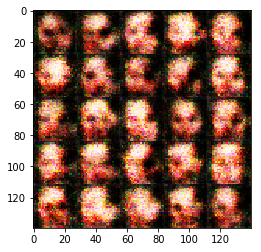

Epoch 1/1... Discriminator Loss: 1.0195... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0209... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0252... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0197... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.0195... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.6927


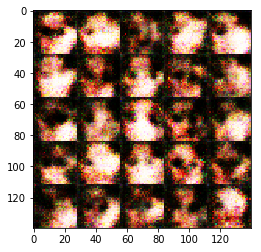

Epoch 1/1... Discriminator Loss: 1.0221... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.0201... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0201... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.5999... Generator Loss: 0.3475
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.4555


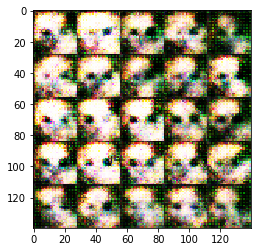

Epoch 1/1... Discriminator Loss: 1.6833... Generator Loss: 0.3701
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.4890
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.0902... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 1.5962... Generator Loss: 0.3346
Epoch 1/1... Discriminator Loss: 1.0366... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.0369... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 0.6902


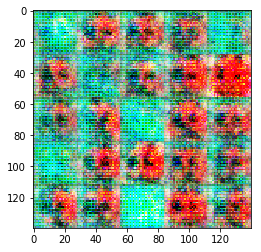

Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.0946... Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.6572... Generator Loss: 0.3488
Epoch 1/1... Discriminator Loss: 1.5411... Generator Loss: 0.3737
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 0.6666
Epoch 1/1... Discriminator Loss: 1.5295... Generator Loss: 0.3943
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 0.6744


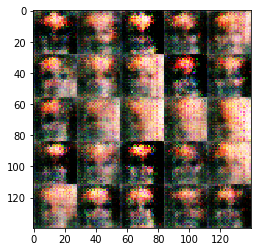

Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.5637
Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.4685
Epoch 1/1... Discriminator Loss: 1.6117... Generator Loss: 0.3389
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.4644
Epoch 1/1... Discriminator Loss: 1.5176... Generator Loss: 0.3836
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.5371
Epoch 1/1... Discriminator Loss: 1.4625... Generator Loss: 0.4084


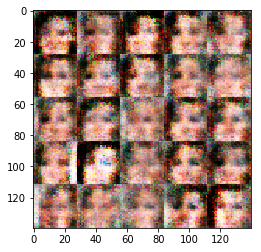

Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.6040... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.2007... Generator Loss: 0.5792
Epoch 1/1... Discriminator Loss: 1.5456... Generator Loss: 0.3685
Epoch 1/1... Discriminator Loss: 1.7604... Generator Loss: 0.3256
Epoch 1/1... Discriminator Loss: 1.5188... Generator Loss: 0.3724
Epoch 1/1... Discriminator Loss: 1.3180... Generator Loss: 0.5425
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.4987
Epoch 1/1... Discriminator Loss: 1.9800... Generator Loss: 0.3149


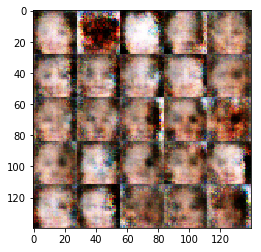

Epoch 1/1... Discriminator Loss: 1.5407... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 0.4776
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.5374
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.4584
Epoch 1/1... Discriminator Loss: 1.6291... Generator Loss: 0.3192
Epoch 1/1... Discriminator Loss: 1.4453... Generator Loss: 0.4399
Epoch 1/1... Discriminator Loss: 1.5272... Generator Loss: 0.3764
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.3701
Epoch 1/1... Discriminator Loss: 1.4657... Generator Loss: 0.4285
Epoch 1/1... Discriminator Loss: 1.5688... Generator Loss: 0.3685


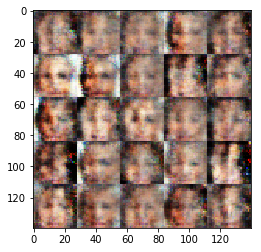

Epoch 1/1... Discriminator Loss: 1.4685... Generator Loss: 0.4341
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.4322... Generator Loss: 0.4543
Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.4297
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.4559
Epoch 1/1... Discriminator Loss: 1.6630... Generator Loss: 0.3353
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.4913
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 0.4643


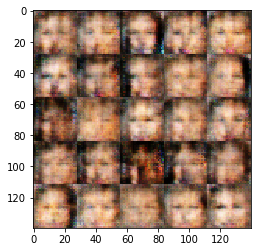

Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 0.6318
Epoch 1/1... Discriminator Loss: 1.1488... Generator Loss: 0.5673
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.5126
Epoch 1/1... Discriminator Loss: 1.5290... Generator Loss: 0.3824
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.3924
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.4549
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.5327
Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 0.6653


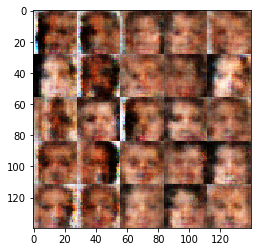

Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.5211
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 0.6577
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.1382... Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.1161... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.0443... Generator Loss: 0.6868


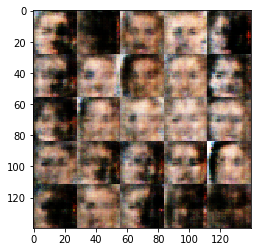

Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.0852... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.5569
Epoch 1/1... Discriminator Loss: 1.4841... Generator Loss: 0.4537
Epoch 1/1... Discriminator Loss: 1.0716... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.0811... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 0.3822
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.4557
Epoch 1/1... Discriminator Loss: 1.1693... Generator Loss: 0.5881


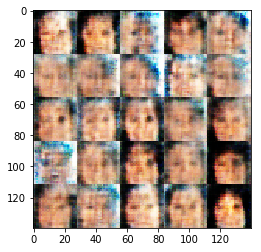

Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3504
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 0.5656
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.5859... Generator Loss: 0.3513
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 0.6917


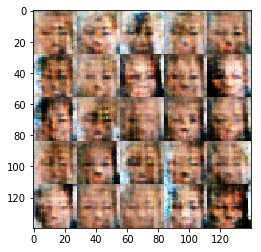

Epoch 1/1... Discriminator Loss: 1.0266... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 0.6874
Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.0346... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 0.6798
Epoch 1/1... Discriminator Loss: 1.0491... Generator Loss: 0.6879
Epoch 1/1... Discriminator Loss: 1.0553... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 0.6891
Epoch 1/1... Discriminator Loss: 1.5978... Generator Loss: 0.3371


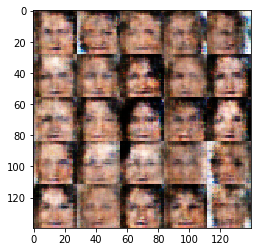

Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 1.0407... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.6411
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.0357... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.0379... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.6537... Generator Loss: 0.3381
Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 0.4322


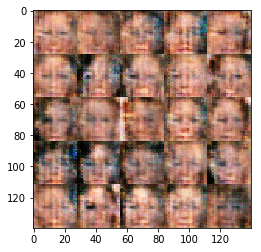

Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.6525
Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 0.6837
Epoch 1/1... Discriminator Loss: 1.0369... Generator Loss: 0.6858
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 0.6898
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 0.3627


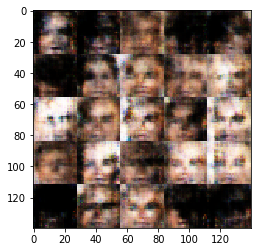

Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.0369... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.0337... Generator Loss: 0.6914
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.6884
Epoch 1/1... Discriminator Loss: 1.0378... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.0327... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.6921


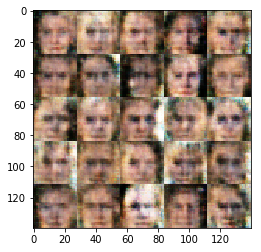

Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.0271... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.6690... Generator Loss: 0.3366


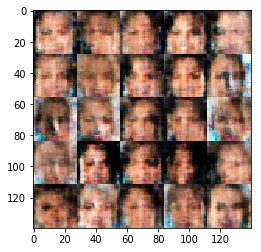

Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.0248... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.6929
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.0226... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0265... Generator Loss: 0.6868
Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.6913


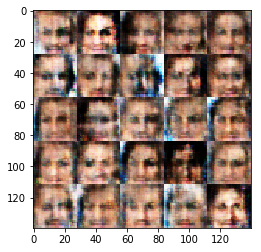

Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 1.0265... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.6647... Generator Loss: 0.3212
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.0243... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 0.6922


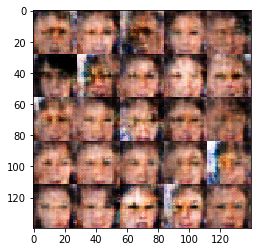

Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.0268... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 0.6930
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 1.0468... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.0234... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 0.6910


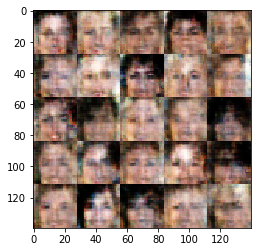

Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.6925
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.0486... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.0764... Generator Loss: 0.6570
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.4634


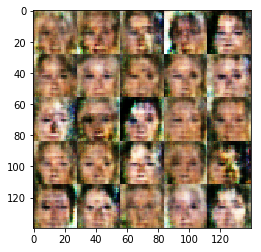

Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 1.0341... Generator Loss: 0.6845
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.6964... Generator Loss: 0.3259
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 0.6913


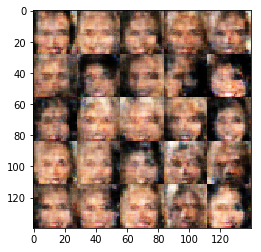

Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.0276... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.0362... Generator Loss: 0.6856


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.